In [2]:
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

# mean, median, STD, 

In [3]:
tframe = gpd.read_file("data/NISAR_track_frames/tframe_left_look.gpkg")
tframe.set_crs("EPSG:4326")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/Users/yunjunz/tools/miniconda3/envs/insar/lib/python3.7/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [54]:
tframe['centroid'] = tframe.centroid
tframe = tframe.set_geometry('centroid')

/Users/yunjunz/tools/miniconda3/envs/insar/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


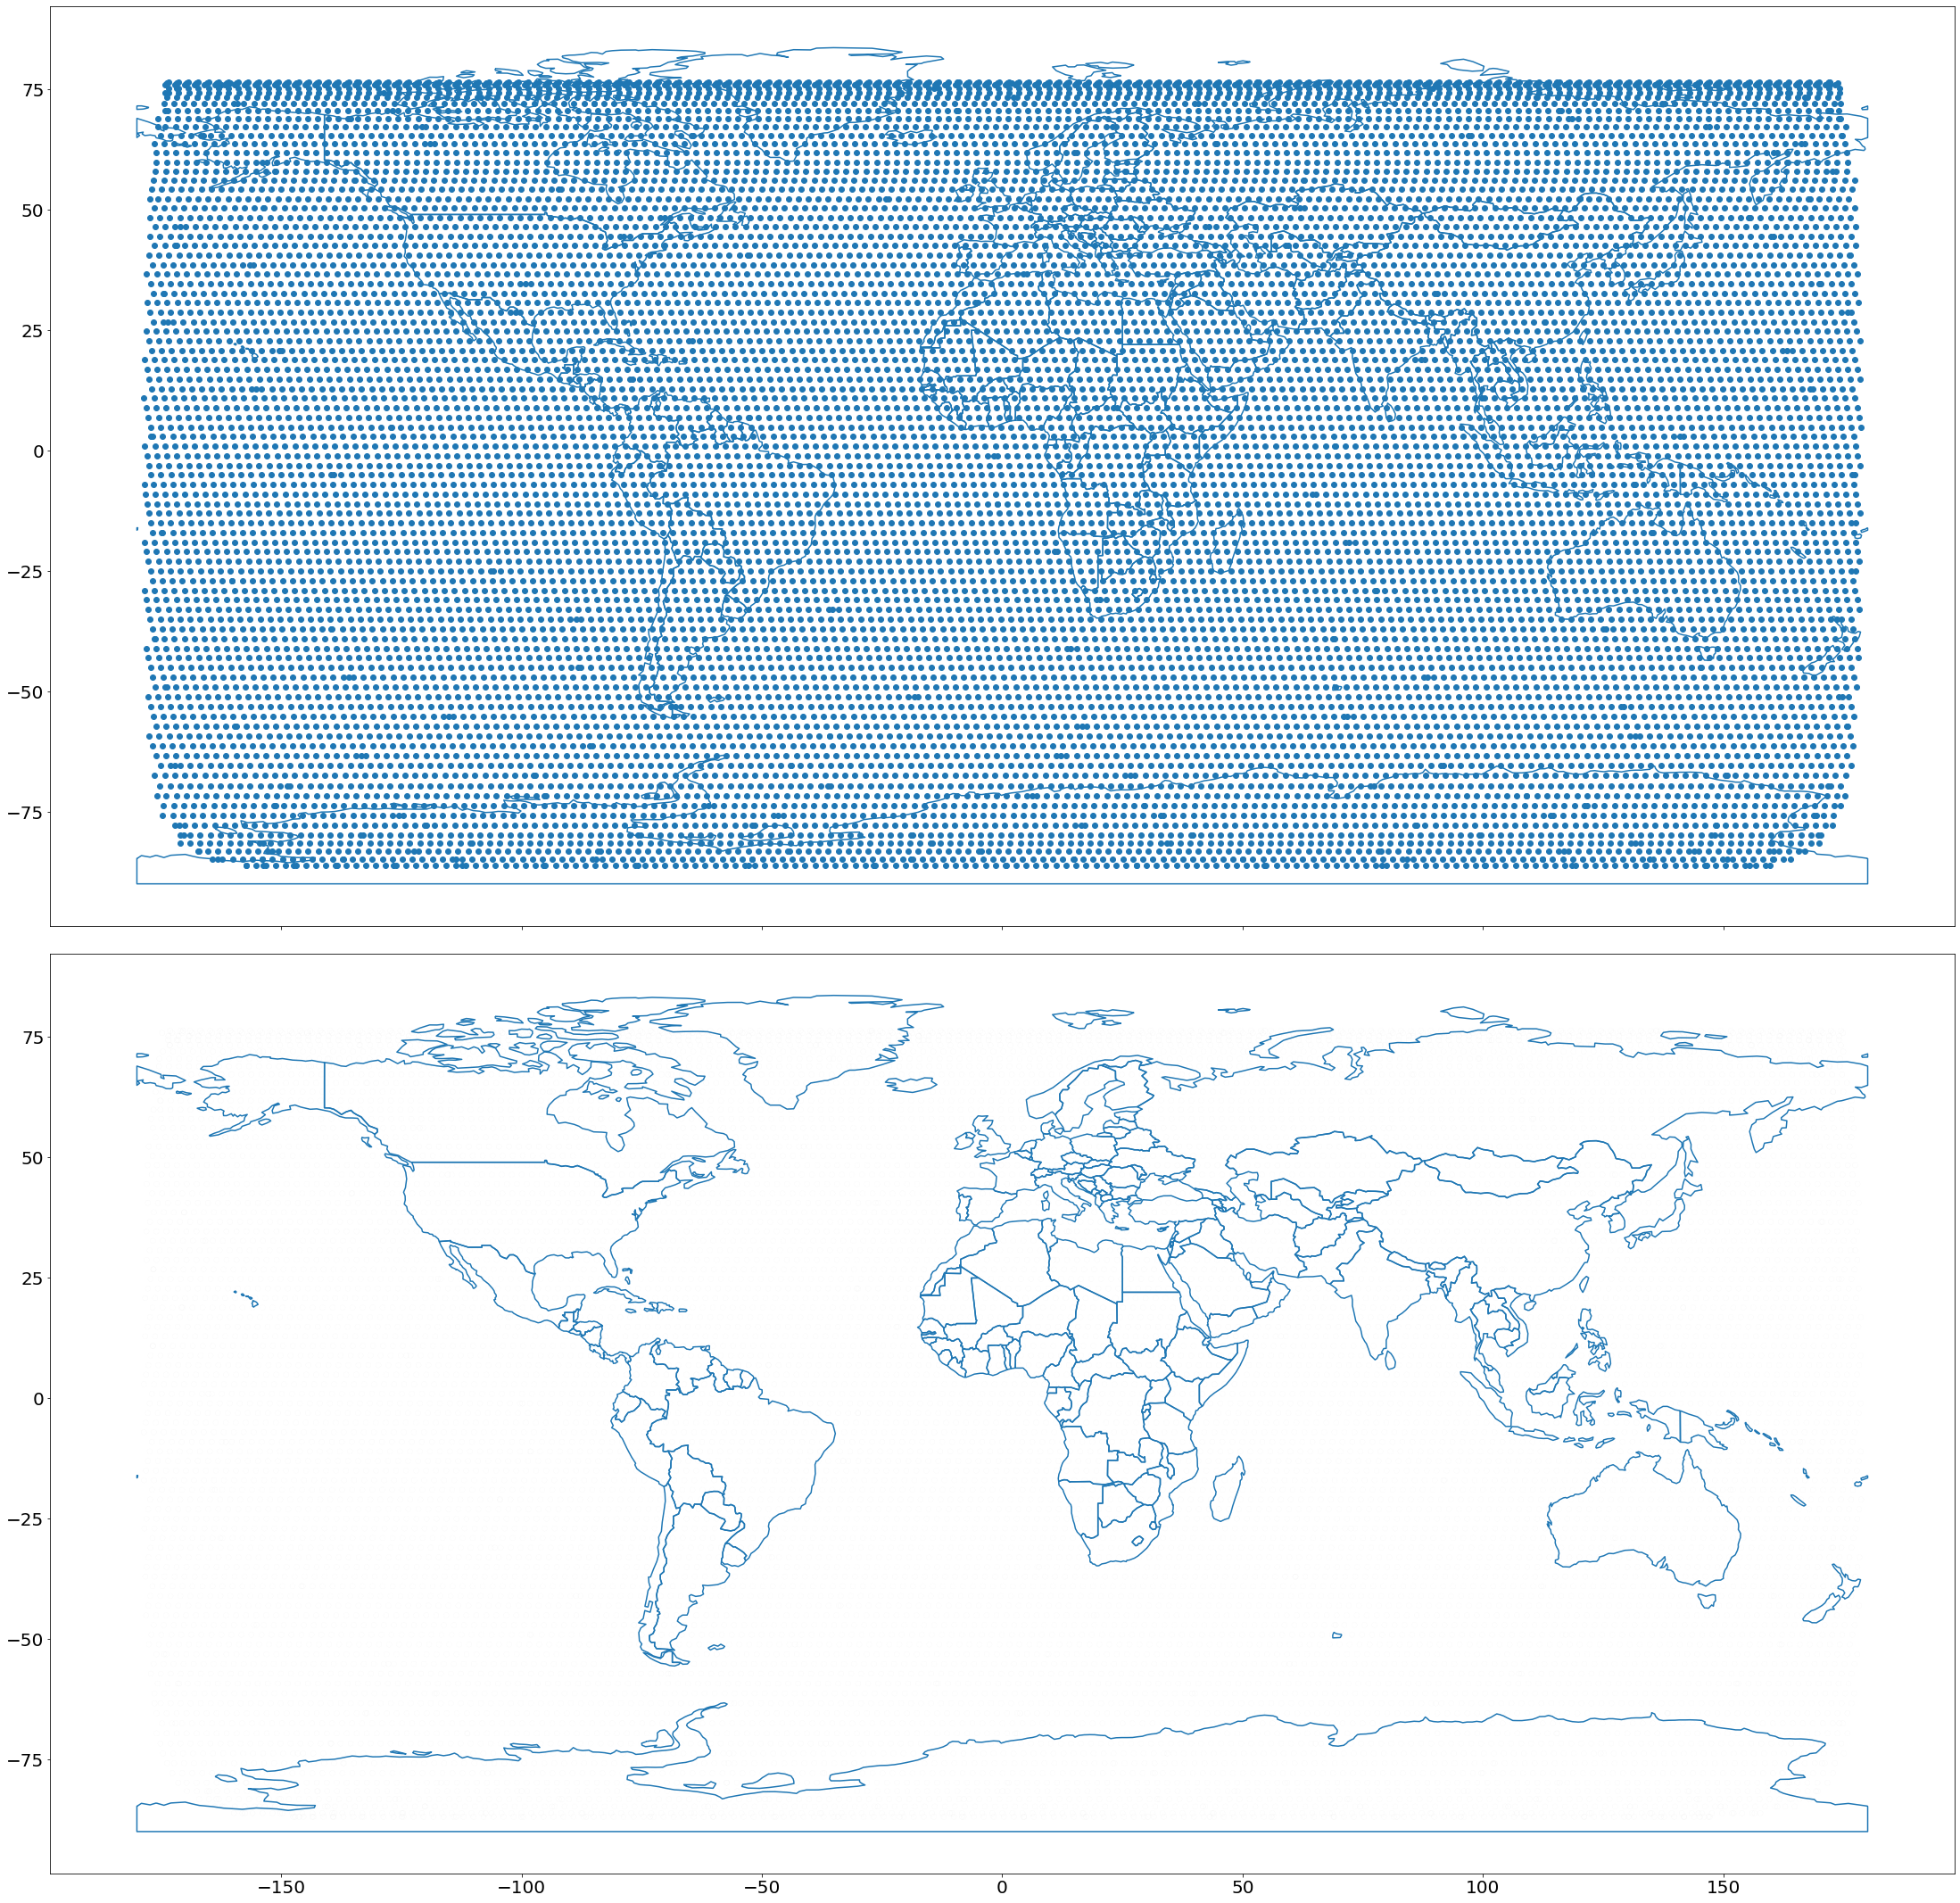

In [55]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30, 30), sharex=True)

ax = axs[0]
tframe.query("passDirection=='Ascending'").plot(ax=ax)
world.boundary.plot(ax=ax)

ax = axs[1]
tframe.query("passDirection=='Descending'").plot(ax=ax, color='k', lw=0.01, facecolor="none")
world.boundary.plot(ax=ax)

fig.tight_layout()
plt.show()

In [4]:
# Example to extract UTC time for one frame
ts = tframe.iloc[0].startET
te = tframe.iloc[0].endET
tcenter = (ts + te)/2.0
frame_time_utc = datetime.datetime(2000,1,1) + datetime.timedelta(seconds=tcenter)
print(frame_time_utc)

2022-01-01 00:33:17.722153


In [7]:
from mintpy.utils import ptime
lat, lon = tframe.iloc[0].satelliteLat, tframe.iloc[0].satelliteLon
print('lat/lon = {}/{}'.format(lat, lon))
ptime.utc2solar_time(frame_time_utc, lon)

lat/lon = -2.059353943039941e-05/-98.02205980089464


datetime.datetime(2021, 12, 31, 17, 58, 30, 949599)

In [6]:
tframe.iloc[0].passDirection

'Ascending'

In [56]:
# coordinates of the center of one frame
frame_cenetr = tframe.iloc[0].geometry.centroid
print(frame_cenetr)

POINT (-102.9960333207457 -1.089758002345093)


In [57]:
print(tframe.iloc[0].satelliteLat)
print(tframe.iloc[0].satelliteLon)

-2.059353943039941e-05
-98.02205980089464


In [ ]:
for index, row in track_frame.iterrows():
    #do what you want
    # get lat lon of the center of the frame (center of geometry POLYGON)
    # get sat lat lon hgt if you want
    # get UTC time at the center
    

In [58]:
tframe

,track,frame,satelliteLat,satelliteLon,satelliteHeight,passDirection,velocityAlongTrack,velocityVertical,startET,endET,...,meanTopo,hasLand,fractionLand,hasSeaIce,epsg,isSNWG,isCalVal,isDNC,geometry,centroid
0,1,1,-0.000021,-98.022060,753198.181558,Ascending,7571.379828,-8.728031,6.943124e+08,6.943124e+08,...,0.0,False,0.0,False,32713,False,False,False,"MULTIPOLYGON (((-101.68364 -1.87879, -101.7000...",POINT (-102.99603 -1.08976)
1,1,2,1.999994,-98.455426,752928.450391,Ascending,7571.652714,-7.215869,6.943124e+08,6.943124e+08,...,0.0,False,0.0,False,32613,False,False,False,"MULTIPOLYGON (((-102.11332 0.11695, -102.12969...",POINT (-103.42722 0.90294)
2,1,3,4.000008,-98.889514,752703.250799,Ascending,7571.866525,-5.700460,6.943124e+08,6.943125e+08,...,0.0,False,0.0,False,32613,False,False,False,"MULTIPOLYGON (((-102.54817 2.11229, -102.56454...",POINT (-103.86532 2.89512)
3,1,4,6.000022,-99.325064,752522.603345,Ascending,7572.021295,-4.189187,6.943125e+08,6.943125e+08,...,0.0,False,0.0,False,32613,False,False,False,"MULTIPOLYGON (((-102.98895 4.10723, -103.00534...",POINT (-104.31109 4.88676)
4,1,5,8.000037,-99.762832,752386.319501,Ascending,7572.117344,-2.689366,6.943125e+08,6.943125e+08,...,0.0,False,0.0,False,32613,False,False,False,"MULTIPOLYGON (((-103.43644 6.10173, -103.45287...",POINT (-104.76536 6.87782)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30443,173,172,-10.000092,-95.840223,755199.332633,Ascending,7569.148150,-15.980894,6.953490e+08,6.953490e+08,...,0.0,False,0.0,False,32714,False,False,False,"MULTIPOLYGON (((-99.58875 -11.86312, -99.60558...",POINT (-100.91965 -11.06038)
30444,173,173,-8.000077,-96.281095,754714.630809,Ascending,7569.706965,-14.595911,6.953490e+08,6.953491e+08,...,0.0,False,0.0,False,32714,False,False,False,"MULTIPOLYGON (((-100.00283 -9.86550, -100.0195...",POINT (-101.32648 -9.06533)
30445,173,174,-6.000063,-96.718947,754271.196633,Ascending,7570.210752,-13.170842,6.953491e+08,6.953491e+08,...,0.0,False,0.0,False,32714,False,False,False,"MULTIPOLYGON (((-100.41870 -7.86826, -100.4352...",POINT (-101.73691 -7.07074)
30446,173,175,-4.000049,-97.154558,753870.102704,Ascending,7570.658179,-11.712931,6.953491e+08,6.953491e+08,...,0.0,False,0.0,False,32714,False,False,False,"MULTIPOLYGON (((-100.83702 -5.87140, -100.8535...",POINT (-102.15155 -5.07661)
